In [36]:
#pip install tensorflow
# pip uninstall tensorflow -y

In [3]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [2]:
pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\nuwai\anaconda3\envs\myenv\lib\site-packages
Requires: tensorflow-intel
Required-by: myTokenize
Note: you may need to restart the kernel to use updated packages.


In [6]:
import sys
print(sys.executable)

c:\Users\nuwai\Anaconda3\envs\myenv\python.exe


In [1]:
import pandas as pd
import data_config as cfg
import time
from tabulate import tabulate

### Data Collection. 
The dataset includes detailed information on resale transactions of HDB flats between January 1, 2017, and March 30, 2024. The dataset contains 180,154 rows and 11 columns and was downloaded on May 23, 2024. 

**Dataset URL**: [HDB Resale Prices](https://beta.data.gov.sg/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view) 
**HDB RPI URL**:[HDB Resale Prices Index](https://www.hdb.gov.sg/residential/selling-a-flat/overview/resale-statistics)

In [ ]:
# df_raw = pd.read_csv('./data/SGHDB2017-2024.csv')
# cfg.save_dataset_info(df_raw, fname='dataset_info.csv')

# df = cfg.adjust_resale_price(df_raw, cut_off_date='2024-04-01')
# cfg.visualize_adjusted_price(df[['month', 'resale_price', 'adjusted_price']].copy(), fname='adjusted_price.png')

# df_clean = cfg.preprocess_data(df)
# print(df_raw.shape, df.shape, df_clean.shape)
# df_clean.to_csv('./data/SGHDB2017-2024_clean.csv', index=False)

Install Required Libraries: 
Ensure you have the necessary libraries installed. You can install them using pip if they are not already installed.
```sgh 
pip install tensorflow pandas scikit-learn
```

### Step 1: 
The project starts by importing the pandas library and loading a cleaned CSV file named {SGHDB2017-2024_clean.csv} into a Pandas DataFrame $df$. Then, the {adjusted_price} column, which represents the housing prices to be predicted, is extracted and stored in the variable $y$ and the remaining columns, which serve as features for the model, are stored in the variable $X$.

In [2]:
# Step 1: Load the data
import pandas as pd
df = pd.read_csv('./data/SGHDB2017-2024_clean.csv')
y = df['adjusted_price'].values   # Target
X = df.drop(columns = 'adjusted_price')  # Features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175672 entries, 0 to 175671
Data columns (total 52 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   flat_type                          175672 non-null  int64  
 1   floor_area_sqm                     175672 non-null  float64
 2   adjusted_price                     175672 non-null  float64
 3   floor                              175672 non-null  float64
 4   remaining_lease_months             175672 non-null  int64  
 5   town_ANG MO KIO                    175672 non-null  float64
 6   town_BEDOK                         175672 non-null  float64
 7   town_BISHAN                        175672 non-null  float64
 8   town_BUKIT BATOK                   175672 non-null  float64
 9   town_BUKIT MERAH                   175672 non-null  float64
 10  town_BUKIT PANJANG                 175672 non-null  float64
 11  town_BUKIT TIMAH                   1756

In [3]:
df.shape

(175672, 52)

In [9]:
df.head()

,flat_type,floor_area_sqm,adjusted_price,floor,remaining_lease_months,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,1,44.0,318285.287528,11.0,736,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,67.0,342979.835698,2.0,727,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,67.0,359442.867812,2.0,749,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,68.0,363558.625840,5.0,745,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,67.0,363558.625840,2.0,749,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 2: Prepare the Data:
The dataset is well maintained and prepared by the Singapore government's open data portal. There is no missing data, which simplifies the preprocessing steps. 
Load your dataset and prepare it for training. This includes splitting it into training and testing sets and normalizing the features.

In [10]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Step 2: Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize continuous features
continuous_columns = ['flat_type', 'floor_area_sqm',  'floor', 'remaining_lease_months']
binary_columns = df.columns.difference(continuous_columns + ['adjusted_price']).tolist()
scaler = StandardScaler()
X_train_continuous = scaler.fit_transform(X_train[continuous_columns])
X_test_continuous = scaler.transform(X_test[continuous_columns])

# Combine scaled continuous features and binary features
X_train = np.hstack([X_train_continuous, X_train[binary_columns].values])
X_test = np.hstack([X_test_continuous, X_test[binary_columns].values])

### Step 3: 
This step defines a function create_regression_model that constructs a feedforward neural network model for regression using TensorFlow's Keras API. 

In [67]:
import tensorflow as tf

def create_regression_model(input_shape, params={}):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),   
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

create a model with three hidden layer neural network

In [68]:
def create_three_hlayer_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

create a model with four hidden layer neural network

In [80]:
def create_four_hlayer_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),   # 1st hidden layer
        tf.keras.layers.Dense(64, activation='relu'),    # 2nd hidden layer                   
        tf.keras.layers.Dense(32, activation='relu'),    # 3rd hidden layer
        tf.keras.layers.Dense(16, activation='relu'),    # 4th hidden layer
        tf.keras.layers.Dense(1)                         # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [74]:
from tensorflow.keras import regularizers

def create_best_nn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),

        tf.keras.layers.Dense(128, kernel_regularizer=regularizers.l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.1),

        tf.keras.layers.Dense(64, kernel_regularizer=regularizers.l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.1),

        tf.keras.layers.Dense(32, kernel_regularizer=regularizers.l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.1),

        tf.keras.layers.Dense(16, kernel_regularizer=regularizers.l2(1e-4)),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [75]:
def create_balanced_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),

        tf.keras.layers.Dense(64, kernel_regularizer=regularizers.l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dense(32, kernel_regularizer=regularizers.l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.2),  # Add dropout here (after 2nd layer)

        tf.keras.layers.Dense(16, kernel_regularizer=regularizers.l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dense(8, kernel_regularizer=regularizers.l2(1e-4)),
        tf.keras.layers.Activation('relu'),

        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    df_results = pd.DataFrame(columns=['Train', 'Test'])

    # Train predictions
    y_pred_train = model.predict(X_train)
    df_results.loc['Root Mean Squared Error', 'Train'] = np.sqrt(mean_squared_error(y_train, y_pred_train))
    df_results.loc['Mean Absolute Error', 'Train'] = mean_absolute_error(y_train, y_pred_train)
    df_results.loc['Mean Absolute Percentage Error', 'Train'] = mean_absolute_percentage_error(y_train, y_pred_train) * 100
    df_results.loc['R2 Score', 'Train'] = r2_score(y_train, y_pred_train)

    # Test predictions
    y_pred_test = model.predict(X_test)
    df_results.loc['Root Mean Squared Error', 'Test'] = np.sqrt(mean_squared_error(y_test, y_pred_test))
    df_results.loc['Mean Absolute Error', 'Test'] = mean_absolute_error(y_test, y_pred_test)
    df_results.loc['Mean Absolute Percentage Error', 'Test'] = mean_absolute_percentage_error(y_test, y_pred_test) * 100
    df_results.loc['R2 Score', 'Test'] = r2_score(y_test, y_pred_test)

    df_results = df_results.astype('Float64').round(2)
    print(tabulate(df_results, headers='keys', tablefmt='grid'))
    return df_results

    # df_results.to_csv('./data/model_evaluation.csv')

### Step 4: 
The model is trained using the training data  (\(X_{\text{train}}\) and \(y_{\text{train}}\)). The training process runs for 10 epochs (def: \ref{def:epoch}) with a batch size of 32. 

In [20]:
# Step 4: Create and train the model
# Clear previous model
from tensorflow.keras import backend as K
K.clear_session()

base_line_model = create_regression_model(input_shape=[X_train.shape[1]])
# Track training time
start_time = time.time()
history = base_line_model.fit(X_train, y_train, epochs=10, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=0)
end_time = time.time()
baseline_training_duration = end_time - start_time
print(f"\nTraining time: {baseline_training_duration:.2f} seconds")


Training time: 150.20 seconds


In [21]:
base_line_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1664      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2209 (8.63 KB)
Trainable params: 2209 (8.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 5:
In the last step, the model is evaluated using various performance metrics and saves the evaluation results to a CSV file.

In [77]:
baseline_reslults = evaluate_model(base_line_model, X_train, y_train, X_test, y_test)
print(baseline_reslults)

1647/1647 [==============================] - 6s 4ms/step
+--------------------------------+----------+----------+
|                                |    Train |     Test |
+================================+==========+==========+
| Root Mean Squared Error        | 88649.8  | 88409.1  |
+--------------------------------+----------+----------+
| Mean Absolute Error            | 66801.7  | 66595.5  |
+--------------------------------+----------+----------+
| Mean Absolute Percentage Error |    11.2  |    11.19 |
+--------------------------------+----------+----------+
| R2 Score                       |     0.81 |     0.81 |
+--------------------------------+----------+----------+
                                   Train      Test
Root Mean Squared Error         88649.82  88409.15
Mean Absolute Error             66801.73  66595.54
Mean Absolute Percentage Error      11.2     11.19
R2 Score                            0.81      0.81


In [23]:
from tensorflow.keras import backend as K
K.clear_session()

three_hl_model = create_three_hlayer_model(input_shape=[X_train.shape[1]])
# Track training time
start_time = time.time()
history = three_hl_model.fit(X_train, y_train, epochs=10, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=0)
end_time = time.time()
three_hl_training_duration = end_time - start_time
print(f"\nTraining time: {three_hl_training_duration:.2f} seconds")


Training time: 169.71 seconds


In [24]:
three_hl_results = evaluate_model(three_hl_model, X_train, y_train, X_test, y_test)
print(three_hl_results)


1647/1647 [==============================] - 3s 2ms/step
+--------------------------------+----------+----------+
|                                |    Train |     Test |
+================================+==========+==========+
| Root Mean Squared Error        | 63202.2  | 63042    |
+--------------------------------+----------+----------+
| Mean Absolute Error            | 45949.6  | 45860.3  |
+--------------------------------+----------+----------+
| Mean Absolute Percentage Error |     7.48 |     7.48 |
+--------------------------------+----------+----------+
| R2 Score                       |     0.9  |     0.9  |
+--------------------------------+----------+----------+
                                   Train      Test
Root Mean Squared Error         63202.22  63041.98
Mean Absolute Error             45949.57  45860.33
Mean Absolute Percentage Error      7.48      7.48
R2 Score                             0.9       0.9


In [81]:
from tensorflow.keras import backend as K
K.clear_session()

four_hl_model = create_four_hlayer_model(input_shape=[X_train.shape[1]])
# Track training time
start_time = time.time()
history = four_hl_model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=0)
end_time = time.time()
four_hl_training_duration = end_time - start_time
print(f"\nTraining time: {four_hl_training_duration:.2f} seconds")


Training time: 337.80 seconds


In [82]:
four_hl_results = evaluate_model(four_hl_model, X_train, y_train, X_test, y_test)
print(four_hl_results)

1647/1647 [==============================] - 3s 2ms/step
+--------------------------------+----------+----------+
|                                |    Train |     Test |
+================================+==========+==========+
| Root Mean Squared Error        | 57532.3  | 57471.8  |
+--------------------------------+----------+----------+
| Mean Absolute Error            | 41176.3  | 41147.1  |
+--------------------------------+----------+----------+
| Mean Absolute Percentage Error |     6.67 |     6.68 |
+--------------------------------+----------+----------+
| R2 Score                       |     0.92 |     0.92 |
+--------------------------------+----------+----------+
                                   Train      Test
Root Mean Squared Error         57532.34  57471.84
Mean Absolute Error             41176.31  41147.05
Mean Absolute Percentage Error      6.67      6.68
R2 Score                            0.92      0.92


In [28]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [30]:
from tensorflow.keras import backend as K
K.clear_session()

best_nn_model = create_best_nn_model(input_shape=[X_train.shape[1]])
# Track training time
start_time = time.time()

# Fit model with early stopping
history = best_nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],   # Add the callback here
    verbose=0
)

end_time = time.time()
best_nn_training_duration = end_time - start_time
print(f"\nTraining time: {best_nn_training_duration:.2f} seconds")


Training time: 628.39 seconds


In [31]:
best_nn_results = evaluate_model(best_nn_model, X_train, y_train, X_test, y_test)
print(best_nn_results)

1647/1647 [==============================] - 8s 5ms/step
+--------------------------------+----------+----------+
|                                |    Train |     Test |
+================================+==========+==========+
| Root Mean Squared Error        | 55187    | 55523.3  |
+--------------------------------+----------+----------+
| Mean Absolute Error            | 39642.8  | 39828.6  |
+--------------------------------+----------+----------+
| Mean Absolute Percentage Error |     6.41 |     6.45 |
+--------------------------------+----------+----------+
| R2 Score                       |     0.93 |     0.92 |
+--------------------------------+----------+----------+
                                   Train      Test
Root Mean Squared Error         55187.04  55523.34
Mean Absolute Error             39642.84  39828.59
Mean Absolute Percentage Error      6.41      6.45
R2 Score                            0.93      0.92


In [34]:
from tensorflow.keras import backend as K
K.clear_session()

balanced_nn_model = create_balanced_model(input_shape=[X_train.shape[1]])
# Track training time
start_time = time.time()

# Fit model with early stopping
history = balanced_nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],   # Add the callback here
    verbose=0
)

end_time = time.time()
bal_nn_training_duration = end_time - start_time
print(f"\nTraining time: {bal_nn_training_duration:.2f} seconds")


Training time: 256.20 seconds


In [35]:
balanced_nn_results = evaluate_model(balanced_nn_model, X_train, y_train, X_test, y_test)

1647/1647 [==============================] - 8s 5ms/step
+--------------------------------+----------+----------+
|                                |    Train |     Test |
+================================+==========+==========+
| Root Mean Squared Error        | 57581.8  | 57585.6  |
+--------------------------------+----------+----------+
| Mean Absolute Error            | 41478.9  | 41393.5  |
+--------------------------------+----------+----------+
| Mean Absolute Percentage Error |     6.73 |     6.73 |
+--------------------------------+----------+----------+
| R2 Score                       |     0.92 |     0.92 |
+--------------------------------+----------+----------+


baseline_training_duration   , baseline_reslults
three_hl_training_duration .three_hl_results 
four_hl_training_duration ,four_hl_results
best_nn_training_duration ,best_nn_results
bal_nn_training_duration ,balanced_nn_results

In [87]:
print(baseline_reslults['Test']['R2 Score'])

0.81


In [88]:
summary_result_dict = {
    'baseline' : {'time':baseline_training_duration , 'r2score': baseline_reslults['Test']['R2 Score'] },
    'model1' : {'time':three_hl_training_duration  , 'r2score': three_hl_results['Test']['R2 Score']},
    'model2' : {'time':four_hl_training_duration  , 'r2score':four_hl_results['Test']['R2 Score']},
    'model3' : {'time':best_nn_training_duration  , 'r2score':best_nn_results['Test']['R2 Score']},
    'model4' :  {'time':bal_nn_training_duration  , 'r2score':balanced_nn_results['Test']['R2 Score']},
}

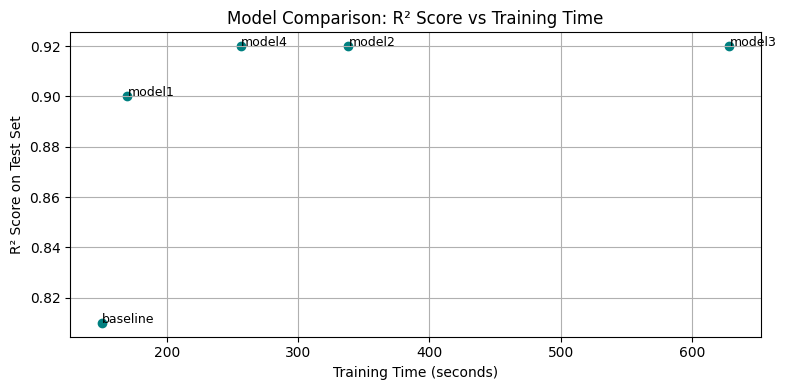

In [91]:
import matplotlib.pyplot as plt

# Extract model names, times, and R² scores
models = list(summary_result_dict.keys())
times = [summary_result_dict[m]['time'] for m in models]
r2_scores = [summary_result_dict[m]['r2score'] for m in models]

# Plot
plt.figure(figsize=(8, 4))
plt.scatter(times, r2_scores, color='teal')

# Annotate model names
for i, model in enumerate(models):
    plt.text(times[i] + 0.5, r2_scores[i], model, fontsize=9)

# Labels and title
plt.xlabel('Training Time (seconds)')
plt.ylabel('R² Score on Test Set')
plt.title('Model Comparison: R² Score vs Training Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
# Combine all result DataFrames with model names as keys
combined_results = pd.concat([
    baseline_reslults,
    three_hl_results,
    four_hl_results,
    best_nn_results,
    balanced_nn_results
], keys=['Baseline', 'Three HL', 'Four HL', 'Best NN', 'Balanced NN'], names=['Model', 'Metric'])

# Optional: round and reset index for display
combined_results = combined_results.round(2).reset_index()

# Display as table
from tabulate import tabulate
print(tabulate(combined_results, headers='keys', tablefmt='grid'))

+----+-------------+--------------------------------+----------+----------+
|    | Model       | Metric                         |    Train |     Test |
+====+=============+================================+==========+==========+
|  0 | Baseline    | Root Mean Squared Error        | 88649.8  | 88409.1  |
+----+-------------+--------------------------------+----------+----------+
|  1 | Baseline    | Mean Absolute Error            | 66801.7  | 66595.5  |
+----+-------------+--------------------------------+----------+----------+
|  2 | Baseline    | Mean Absolute Percentage Error |    11.2  |    11.19 |
+----+-------------+--------------------------------+----------+----------+
|  3 | Baseline    | R2 Score                       |     0.81 |     0.81 |
+----+-------------+--------------------------------+----------+----------+
|  4 | Three HL    | Root Mean Squared Error        | 63202.2  | 63042    |
+----+-------------+--------------------------------+----------+----------+
|  5 | Three

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(y_actual, y_predicted):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted, color='blue')
    plt.xlabel('Actual value')
    plt.ylabel('Predicted value')
    plt.title('Predicted vs Actual')
    plt.show()

In [ ]:
training_time = {
    "baseline": baseline_training_duration,
}